In [1]:
import os
import subprocess
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
from time import time as t
from numba import jit

# import io

# import datetime

import astropy
import astropy.units as u
import astropy.constants as c

# from IPython.display import Image, display_png

from astroquery.simbad import Simbad

import photontools

In [2]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 150

lss = ['-', '--', '-.', ':']

In [3]:
filepath_hewd = "../../hewd/gamtmp.d"
filepath_cowd = "../../cowd/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([4.49999438e+03, 1.54867843e+04, 1.27477734e+01]) * 1e5
# f_ = open(filepath_, mode="r") 

In [4]:
# bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J", "H", "K"])
# color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
# dict_color = dict(zip(bands_from_blue, color_from_blue))

bands_from_blue = np.array(["g", "r", "i", "z"])
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
#     color_from_blue = np.array([plt.cm.viridis(i/bands_from_blue.size) for i in range(1, bands_from_blue.size+1)])
dict_color = dict(zip(bands_from_blue, color_from_blue))


In [5]:
filepath_catalog_lc = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table2.dat"
filepath_catalog_head = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/catalog/fast_transients/2014ApJ...794...23D/table1.dat"


In [6]:
columns_ = ["category", "name", "yaer", "month", "day", "ra_h", "ra_min", "ra_s", 
            "dec_deg", "dec_arcmin", "dec_arcsec", 
            "z", "distance", 
            "lambdag", "lambdar", "lambdai", "lambdaz", "Eb_v"]
df_catalog_head = pd.read_csv(filepath_catalog_head, delim_whitespace=True, header = None, names=columns_)
df_catalog_head.replace("---", np.nan, inplace=True)
df_catalog_head[columns_[11:]] = df_catalog_head[columns_[11:]].astype(float)
df_catalog_head = df_catalog_head[[st in ["A", "B"] for st in df_catalog_head["category"]]]


In [7]:
names_ = ["name", "Filter", "MJD", "Phase", "mag_upper", "mag", "emag", "Instrument"]
df_lc = pd.read_csv(filepath_catalog_lc, delim_whitespace=True, header = None, names=names_)
df_lc["mag_upper"].replace("<", True, inplace=True)
df_lc["mag_upper"].replace(np.nan, False, inplace=True)
df_lc

,name,Filter,MJD,Phase,mag_upper,mag,emag,Instrument
0,PS1-10ah,g_P1,55248.5,-2.7,False,22.18,0.22,PS1
1,PS1-10ah,g_P1,55230.5,-19.5,True,22.38,NaN,PS1
2,PS1-10ah,g_P1,55233.5,-16.7,True,22.60,NaN,PS1
3,PS1-10ah,g_P1,55236.6,-13.8,True,22.40,NaN,PS1
4,PS1-10ah,g_P1,55239.5,-11.1,True,22.75,NaN,PS1
5,PS1-10ah,g_P1,55242.5,-8.3,True,22.70,NaN,PS1
6,PS1-10ah,g_P1,55251.4,0.0,False,19.95,0.05,PS1
7,PS1-10ah,g_P1,55266.5,14.1,False,21.64,0.17,PS1
8,PS1-10ah,g_P1,55281.3,27.8,True,22.02,NaN,PS1
9,PS1-10ah,g_P1,55293.4,39.1,True,22.26,NaN,PS1


In [8]:
class Transient(object):
    def __init__(self):
        self.name = None
        self.instrument = None
        self.Nphoton = None
        self.redshift = None
        self.luminosity_distance = None
        self.Eb_v = None
        self.bands = None
        self.data = None # flux/mag with the same order as self.bands [N_band][N_time, 3] 3: time, flux/mag, error of flux/mag


In [9]:
def calc_model_lc(spectra, transient, filter):
    spectra_ = copy.deepcopy(spectra)
    spectra_ = spectra_.redshift(z=transient.redshift)
    spectra_ = spectra_.dust_extinction(Eb_v = transient.Eb_v, model="maeda")
    lc = photontools.calc_band_flux(spectra_, filter)
    lc = lc.convert_flux_to_magnitude(filter, system="AB", distance=transient.luminosity_distance * u.Mpc)
    return lc

In [48]:
def plot_panstarrs(fig, ax, name, df_header, df_lc):
    
    def get_information_from_df_header(name, df_header):
        df_this = df_header[df_header["name"] == name].iloc[0]
        transient = Transient()
        transient.name = name
        transient.redshift = df_this["z"]
        transient.luminosity_distance = df_this["distance"] # Mpc
        transient.Eb_v = df_this["Eb_v"]
        transient.bands = np.array(["g", "r", "i", "z"])
        transient.data = [[]] * transient.bands.size
        
        return transient

    def get_light_curve_from_df_lc(name, transient, df_lc):
#         transient.bands
        df_this = df_lc[df_lc["name"] == name].sort_values("MJD")
        for i, band in enumerate(transient.bands):
            df_band = df_this[[df_this.loc[j, "Filter"][0] == band for j in df_this.index]]
            transient.data[i] = df_band[["MJD", "Phase", "mag_upper", "mag", "emag"]]
            
        return transient
    
    transient = get_information_from_df_header(name, df_header)
    transient = get_light_curve_from_df_lc(name, transient, df_lc)
    
    for i, band in enumerate(transient.bands):
        # detection
        df_ = transient.data[i][~transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], df_["emag"], fmt="--o", color=dict_color[band], label=band)
#         upper limit
        df_ = transient.data[i][transient.data[i]["mag_upper"]]
        ax.errorbar(df_["Phase"], df_["mag"], fmt="v", color=dict_color[band], label="")
        
    return transient, fig, ax

def plot_model(fig, ax, lc, time_shift = 0., **keys):
    for i, theta in enumerate(lc.thetas):
        for j, phi in enumerate(lc.phis):
            for k, band in enumerate(lc.bands):
                if band != "y":
                    ax.plot((lc.times - time_shift) * lc.Doppler_shift_intrinsic[i,j], lc.data[:,i,j,k], color=dict_color[band], **keys)
    return fig, ax

In [11]:
filter_ps = photontools.read_one_instrument_filters("./photontools/filter_data/panstarrs/")

In [12]:
%time spectra_hewd = photontools.read_Maeda_data(filepath_hewd)
%time spectra_cowd = photontools.read_Maeda_data(filepath_cowd)

CPU times: user 4.74 s, sys: 8.79 s, total: 13.5 s
Wall time: 14.6 s
CPU times: user 5.08 s, sys: 9.18 s, total: 14.3 s
Wall time: 15.6 s


# preprocess spectra

In [13]:
%time spectra_hewd = spectra_hewd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_cowd = spectra_cowd.binning(N_theta_bins=10, N_phi_bins=10)
%time spectra_hewd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_hewd)
%time spectra_cowd = spectra_hewd.Doppler_shift_by_intrinsic_velocity(vel_cowd)


CPU times: user 3.43 s, sys: 2.37 s, total: 5.8 s
Wall time: 6.33 s
CPU times: user 3.26 s, sys: 2.05 s, total: 5.31 s
Wall time: 5.34 s
CPU times: user 824 ms, sys: 66.1 ms, total: 890 ms
Wall time: 899 ms
CPU times: user 797 ms, sys: 67.8 ms, total: 865 ms
Wall time: 872 ms


In [57]:
plt.rcParams["figure.dpi"] = 250


In [69]:
df_catalog_head

,category,name,yaer,month,day,ra_h,ra_min,ra_s,dec_deg,dec_arcmin,dec_arcsec,z,distance,lambdag,lambdar,lambdai,lambdaz,Eb_v
0,A,PS1-10ah,2010,Feb,21,10,48,15.784,57,24,19.48,0.074,330.5,4540.7,5772.9,7001.9,8068.3,0.008
1,A,PS1-10bjp,2010,Oct,24,23,26,21.402,-1,31,23.11,0.113,518.6,4381.6,5570.6,6756.5,7785.5,0.049
2,A,PS1-11qr,2011,Apr,2,9,56,41.767,1,53,38.25,0.324,1685.3,3683.3,4682.9,5679.8,6544.8,0.017
3,A,PS1-12bb,2012,Jan,20,9,57,23.866,3,11,4.47,0.101,459.7,4429.3,5631.3,6830.2,7870.4,0.026
4,A,PS1-12bv,2012,Jan,20,12,25,34.602,46,41,26.97,0.405,2192.2,3471.0,4412.9,5352.3,6167.5,0.010
5,A,PS1-12brf,2012,Oct,10,22,16,6.892,0,58,9.81,0.275,1393.6,3824.9,4862.8,5898.0,6796.3,0.084
6,B,PS1-11bbq,2011,Dec,1,8,42,34.733,42,55,49.61,0.646,3857.8,2962.8,3766.8,4568.7,5264.5,0.026
7,B,PS1-13duy,2013,Nov,1,22,21,47.929,0,14,34.94,0.270,1364.5,3839.9,4882.0,5921.9,6823.1,0.053
8,B,PS1-13dwm,2013,Nov,5,22,20,12.081,0,56,22.35,0.245,1220.8,3917.0,4980.0,6040.8,5960.1,0.054
9,B,PS1-13ess,2013,Dec,26,2,22,9.428,-3,3,0.51,0.296,1517.2,3762.9,4784.0,5803.1,6686.2,0.025


In [83]:
df_catalog_head["name"]

0     PS1-10ah
1    PS1-10bjp
2     PS1-11qr
3     PS1-12bb
4     PS1-12bv
5    PS1-12brf
6    PS1-11bbq
7    PS1-13duy
8    PS1-13dwm
9    PS1-13ess
Name: name, dtype: object

/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:609: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))


{'alpha': 0.1}


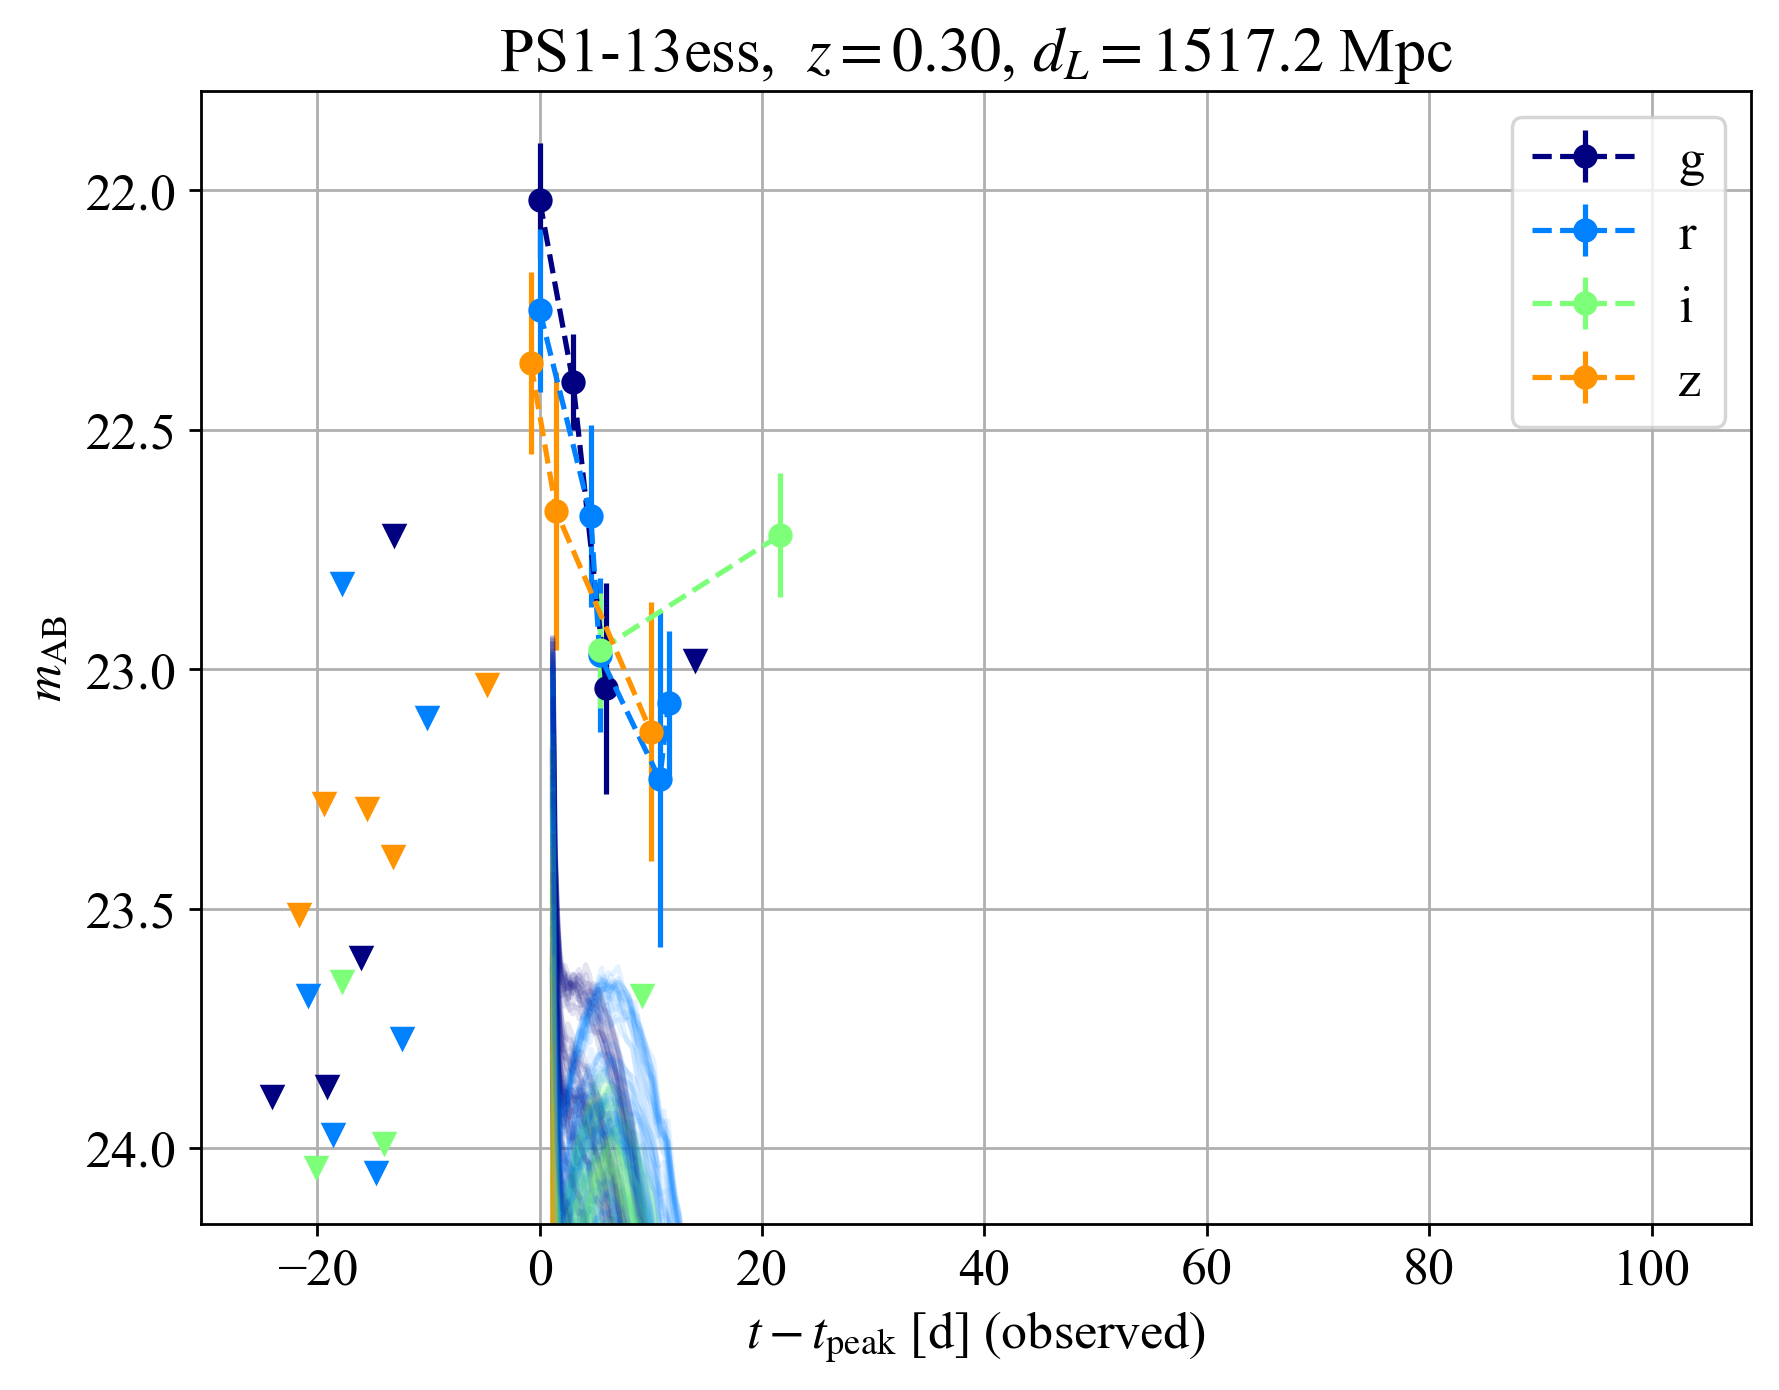

In [94]:
ckeys = {"alpha": 0.1}
tname = "PS1-13ess"
# for i, tname in enumerate(df_catalog_head["name"][9]):
#     print(i, tname)
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
# ax.errorbar(np.arange(3), np.arange(1,4), yerr = np.append([np.nan], np.linspace(0.2, 0.4, 2)), fmt="v")
transient, fig, ax = plot_panstarrs(fig, ax, tname, df_catalog_head, df_lc)
ymin, ymax= ax.get_ylim()


lc = calc_model_lc(spectra_hewd, transient, filter_ps)
fig, ax = plot_model(fig, ax, lc, time_shift=3, **ckeys)

plt.ylim(ymin, ymax)
# plt.title("{:}".format(transient.name))
plt.title(r"{:},  $z = {:.2f}$, $d_L = {:.1f}$ Mpc".format(transient.name, transient.redshift, transient.luminosity_distance))
plt.xlabel(r"$t - t_{\rm{peak}}$ [d] (observed)")
plt.ylabel(r"$m_{\rm{AB}}$")
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
# plt.tight_layout()
# plt.savefig("figs/obs/{}.png".format(tname))
# plt.close()